<a href="https://colab.research.google.com/github/BonaldSo/project_diffusionModel/blob/main/MyDiffusionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install diffusers
import torchvision
from torchvision import transforms, datasets
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import numpy as np
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm import tqdm
import torch.nn as nn
from matplotlib import pyplot as plt
from PIL import Image
from keras.datasets import cifar10
from diffusers import UNet2DModel, DDPMScheduler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.1 MB/s eta 0:00:00


In [ ]:
#Load the data and choose one class, then create the data loader.

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, images, transform=None):
        #To do
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        #To do
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return  image


preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

mydata = datasets.CIFAR10(root = './data', train = True, download = True, transform = None)
images = [img for img, label in mydata if label == 1]
mydataset = CustomDataset(images, transform = preprocess)

dataloader = DataLoader(mydataset, batch_size = 32, shuffle = True)

Files already downloaded and verified


In [ ]:
def show_images(x):
    x = x * 0.5 + 0.5
    grid = torchvision.utils.make_grid(x)
    grid = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid = Image.fromarray(np.array(grid).astype(np.uint8))
    return grid

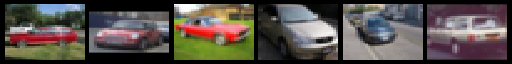

In [ ]:
x_test = next(iter(dataloader))[:6]
show_images(x_test).resize((8 * 64, 64), resample=Image.NEAREST)

In [ ]:
def forwardpass(image, scheduler):
    noise = torch.randn(image.shape).to(device)
    ts = torch.randint(0, 1000, size=(image.shape[0],)).long().to(device)
    newimage = scheduler.add_noise(image, noise, ts)
    return newimage, noise, ts

In [ ]:
# images
scheduler = DDPMScheduler()
ts = torch.tensor([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999])
ts = ts.to(device)
x_test = x_test.to(device)
newimages = []
for t in ts:
    noise = torch.randn(x_test.shape).to(device)
    newimage = scheduler.add_noise(x_test, noise, t)
    newimages.append(newimage)

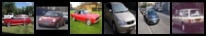

In [ ]:
show_images(newimages[0])

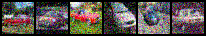

In [ ]:
show_images(newimages[1])

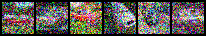

In [ ]:
show_images(newimages[2])

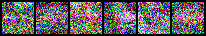

In [ ]:
show_images(newimages[3])

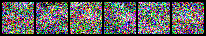

In [ ]:
show_images(newimages[4])

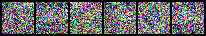

In [ ]:
show_images(newimages[5])

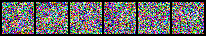

In [ ]:
show_images(newimages[6])

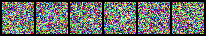

In [ ]:
show_images(newimages[7])

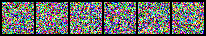

In [ ]:
show_images(newimages[8])

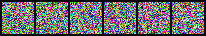

In [ ]:
show_images(newimages[9])

In [ ]:
model = UNet2DModel(
    #To do
    sample_size = 128,
    in_channels = 3,
    out_channels = 3,
    layers_per_block = 2,
    block_out_channels = (128, 128, 256, 512, 512),
    down_block_types = (
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "DownBlock2D",
    ),
    up_block_types = (
        "UpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
 )

In [ ]:
def train(model,data_loader,criterion,optimizer):
    totalloss = 0.0
    with tqdm(data_loader, desc ="   train") as train_tqdm:
        scheduler = DDPMScheduler()
        for batch_idx, inputs in enumerate(train_tqdm):
            model.train()
            inputs = inputs.to(device)
            #To do
            outputs, noise, ts = forwardpass(inputs, scheduler)
            pred = model(outputs, ts, return_dict = False)[0]
            optimizer.zero_grad()
            loss = criterion(noise, pred)
            loss.backward()
            optimizer.step()
            totalloss += loss.detach().item()
    average_train_loss = totalloss / len(data_loader)
    return average_train_loss

In [ ]:
# train u2net model with forward pass
model = model.to(device)
criterion = F.mse_loss
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

for i in range(0,100):
    loss = train(model, dataloader, criterion, optimizer)
    print("loss: ", loss)

   train: 100%|██████████| 157/157 [00:45<00:00,  3.46it/s]


loss:  0.12574609637165526


   train: 100%|██████████| 157/157 [00:39<00:00,  3.98it/s]


loss:  0.059111313918119024


   train: 100%|██████████| 157/157 [00:41<00:00,  3.77it/s]


loss:  0.05315863948528934


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.049603663883201636


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.04933843455591779


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.04437075682862359


   train: 100%|██████████| 157/157 [00:39<00:00,  3.95it/s]


loss:  0.045478250368670294


   train: 100%|██████████| 157/157 [00:39<00:00,  3.95it/s]


loss:  0.04499333031523


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.04362673224038949


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.044089865378418545


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.042416818979771655


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.041986632759973504


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.04078748530951465


   train: 100%|██████████| 157/157 [00:39<00:00,  3.95it/s]


loss:  0.03988302214913497


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.04044637094684847


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03986947662582633


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.04033761732517534


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03960125501249816


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03993080654863719


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03688318872005696


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.04061729293079323


   train: 100%|██████████| 157/157 [00:42<00:00,  3.70it/s]


loss:  0.03828503649420799


   train: 100%|██████████| 157/157 [00:40<00:00,  3.87it/s]


loss:  0.03847233456363724


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03993145616096296


   train: 100%|██████████| 157/157 [00:40<00:00,  3.87it/s]


loss:  0.03974610298966906


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03856198177643263


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03886452671377712


   train: 100%|██████████| 157/157 [00:40<00:00,  3.92it/s]


loss:  0.0384006059615855


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03678708480801552


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03859718627397232


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.037089438059005386


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.036845503813901524


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03760475118994523


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.037414060680160094


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03666056220413773


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03736441332704512


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.037407956631842314


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.035642123128625615


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03658217675153427


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.036796332520853944


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.036227162476557835


   train: 100%|██████████| 157/157 [00:39<00:00,  3.95it/s]


loss:  0.03751905328315345


   train: 100%|██████████| 157/157 [00:39<00:00,  3.94it/s]


loss:  0.036012968861136085


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.0348200237402206


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03555582386032222


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03781460544723234


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.0352186529487846


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03677149172753665


   train: 100%|██████████| 157/157 [00:39<00:00,  3.95it/s]


loss:  0.034742907051495305


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03606749593523467


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.035333451316662275


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.037716479829637106


   train: 100%|██████████| 157/157 [00:40<00:00,  3.92it/s]


loss:  0.03440814677056423


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.035242462358704416


   train: 100%|██████████| 157/157 [00:39<00:00,  3.95it/s]


loss:  0.03505397233281546


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.035663616517262096


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03476583646242596


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.034876834150332554


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03450589053403989


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03584467681350222


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03492631626784042


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03631526476756972


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.034567251350659474


   train: 100%|██████████| 157/157 [00:39<00:00,  3.98it/s]


loss:  0.03436618512437032


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.034581670288447365


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03624751377898227


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.033728720394858885


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.035467729185986674


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03532902070077931


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.034607284049841626


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03363473232313516


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03593397549810303


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.033243608070021365


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.0346553594283285


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03592685388199463


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03500526308254072


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03702838034932591


   train: 100%|██████████| 157/157 [00:40<00:00,  3.90it/s]


loss:  0.03472208426256848


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03500296668724934


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.034220707757030705


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03373546612443058


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03337997242001591


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.032875885314954695


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03383010940234752


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.035062467766878234


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.033824968578851526


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03374889593832432


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03546491034542489


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.031101131633778287


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03476910188699224


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03449160624651393


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.035782905277695246


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03289328898736246


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.033273732716775244


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03292018603414867


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.033469497154994754


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03268289797980884


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]


loss:  0.03321327228146564


   train: 100%|██████████| 157/157 [00:39<00:00,  3.97it/s]


loss:  0.03489319936840967


   train: 100%|██████████| 157/157 [00:39<00:00,  3.96it/s]

loss:  0.03341699923703056


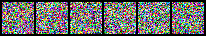

In [ ]:
sample = torch.randn(6, 3, 32, 32).to(device)

#denoise
show_images(sample)

In [ ]:
# train model with sample noise
scheduler = DDPMScheduler()
model = model.to(device)
sample = sample.to(device)
for i, t in enumerate(tqdm(scheduler.timesteps)):
    with torch.no_grad():
        residual = model(sample, t).sample
    sample = scheduler.step(residual, t, sample).prev_sample

100%|██████████| 1000/1000 [00:29<00:00, 34.30it/s]


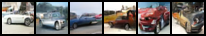

In [ ]:
# print image
show_images(sample)